## Discretisation

Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretisation is also called **binning**, where bin is an alternative name for interval.


### Discretisation helps handle outliers and may improve value spread in skewed variables

Discretisation helps handle outliers by placing these values into the lower or higher intervals, together with the remaining inlier values of the distribution. Thus, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval / bucket. In addition, by creating appropriate bins or intervals, discretisation can help spread the values of a skewed variable across a set of bins with equal number of observations.

####  Unsupervised discretisation methods

- Equal width discretisation
- Equal frequency discretisation
- K-means discretisation

#### Supervised discretisation methods

- Discretisation using decision trees


## Equal width discretisation

Equal width discretisation divides the scope of possible values into N bins of the same width.The width is determined by the range of values in the variable and the number of bins we wish to use to divide the variable:

width = (max value - min value) / N

where N is the number of bins or intervals.

There is no rule of thumb to define N, that is something to determine experimentally.

#### sklearn we use KBinsDiscretizer

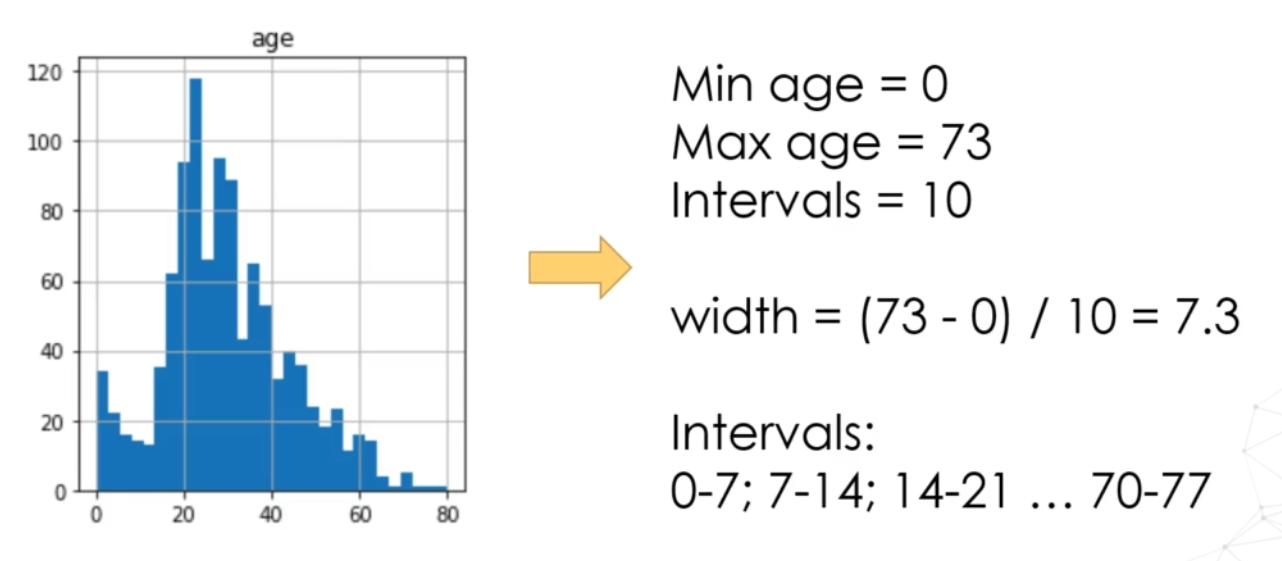

In [1]:
from IPython.display import Image
Image(filename="Images/d1.png")

## Equal frequency discretisation

Equal frequency discretisation divides the scope of possible values of the variable into N bins, where each bin carries the same amount of observations. This is particularly useful for skewed variables as it spreads the observations over the different bins equally. We find the interval boundaries by determining the quantiles.

Equal frequency discretisation using quantiles consists of dividing the continuous variable into N quantiles, N to be defined by the user.

Equal frequency binning is straightforward to implement and by spreading the values of the observations more evenly it may help boost the algorithm's performance. This arbitrary binning may also disrupt the relationship with the target.

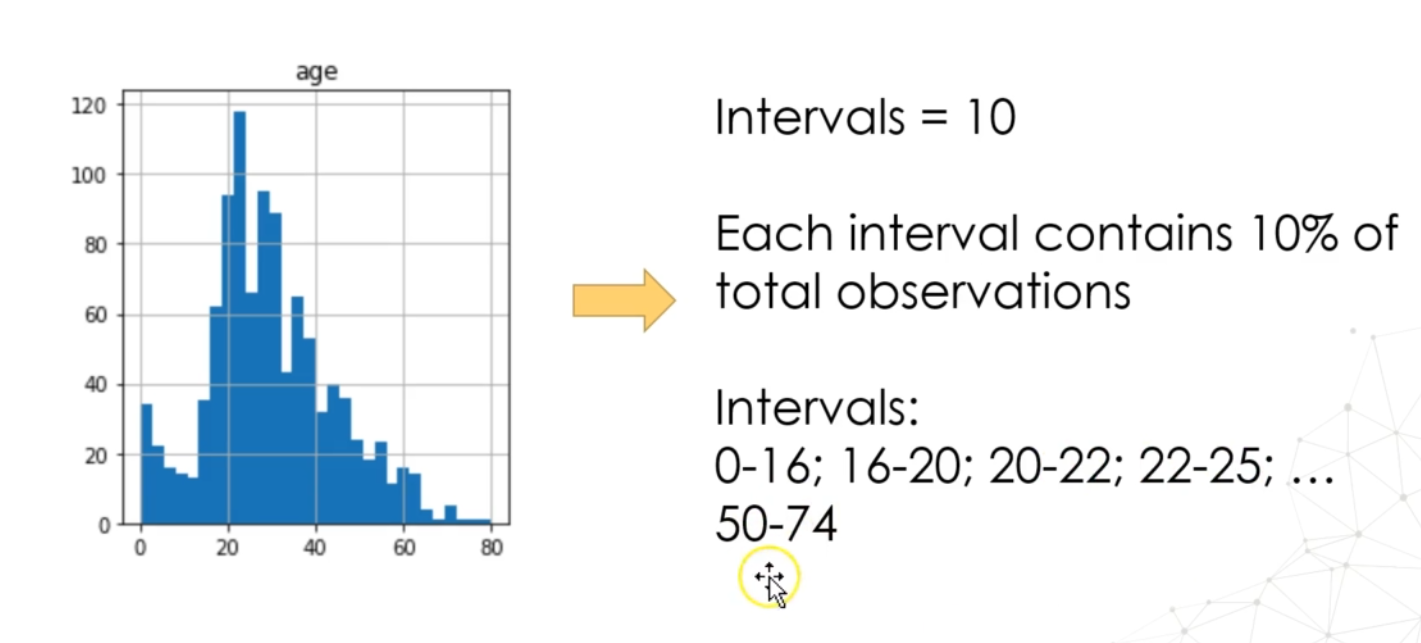

In [2]:
Image(filename="Images/d2.png")

## Discretisation with k-means clustering

This discretisation method consists in applying k-means clustering to the continuous variable.

Briefly, the algorithm works as follows:

- 1) Initialization: random creation of K centers
- 2) Each data point is associated with the closest center
- 3) Each center position is re-computed as the center of its associated points

Steps 2 and 3 are repeated until convergence is reached. The algorithm minimises the pairwise squared deviations of points within the same cluster.

## Discretisation plus Encoding

What shall we do with the variable after discretisation? should we use the buckets as a numerical variable? or should we use the intervals as categorical variable?

The answer is, you can do either.

If you are building decision tree based algorithms and the output of the discretisation are integers (each integer referring to a bin), then you can use those directly, as decision trees will pick up non-linear relationships between the discretised variable and the target.

If you are building linear models instead, the bins may not necessarily hold a linear relationship with the target. In this case, it may help improve model performance to treat the bins as categories and to one hot encoding, or target guided encodings like mean encoding, weight of evidence, or target guided ordinal encoding.

We can easily do so by combining feature-engine's discretisers and encoders.

## Discretisation with Decision Trees


Discretisation with Decision Trees consists in using a decision tree to identify the optimal bins. When a decision tree makes a decision, it assigns an observation to one of n end leaves. Therefore, any decision tree will generate a discrete output, which values are the predictions at each of its n leaves.

How to do discretisation with trees?

- 1) Train a decision tree of limited depth (2, 3  or 4) using the variable we want to discretise and the target.
- 2) Replace the values by the output returned by the tree. 


### Advantages

- The output returned by the decision tree is monotonically related to the target.
- The tree end nodes, or bins in the discretised variable show decreased entropy: that is, the observations within each bin are more similar among themselves than to those of other bins.

### Limitations

- Prone over-fitting
- More importantly, some tuning of the tree parameters needed to obtain the optimal number of splits (e.g., tree depth, minimum number of samples in one partition, maximum number of partitions, and a minimum information gain). This it can be time consuming.

#### For last 2 use feature-engine lib

## Domain knowledge discretisation

Frequently, when engineering variables in a business setting, the business experts determine the intervals in which they think the variable should be divided so that it makes sense for the business. Typical examples are the discretisation of variables like Age and Income. 

Income for example is usually capped at a certain maximum value, and all incomes above that value fall into the last bucket. As per Age, it is usually divided in certain groups according to the business need, for example division into  0-21 (for under-aged), 20-30 (for young adults), 30-40, 40-60, and > 60 (for retired or close to) are frequent.